In [1]:
# Basic imports
import os,sys,re
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import torch
print(os.getpid())

3735392


In [2]:
# ChromAn related imports
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [5]:
ls /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/

Analysis/    H0M1/  H2M3/  H4M5/  H6M7/  H8M9/     Segmentation/
Experiment/  H1M2/  H3M4/  H5M6/  H7M8/  Mosaics/  Tests/


# Option 1: quickly visualize one field of view 

In [6]:
image_folder = r'/lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/H0M1'
#image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230630-4T1cell_methanol\H0M1'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
#print(image_basenames)

/lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/H0M1


In [8]:
sel_fov_id = 10

In [9]:
image_filename = os.path.join(image_folder, image_basenames[sel_fov_id])
print(image_filename)
# load image
daxp = dax_process.DaxProcesser(
    image_filename,
    CorrectionFolder=r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50' )
daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

/lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/H0M1/Conv_zscan_010.dax
Initialize DaxProcesser for file:/lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/H0M1/Conv_zscan_010.dax
- New save file: /lab/weissman_imaging/puzheng/msBrain/20230816-asw016_region_1_MF1msBrainImmune/H0M1/Conv_zscan_010_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  13 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 8.882s.


<IPython.core.display.Javascript object>


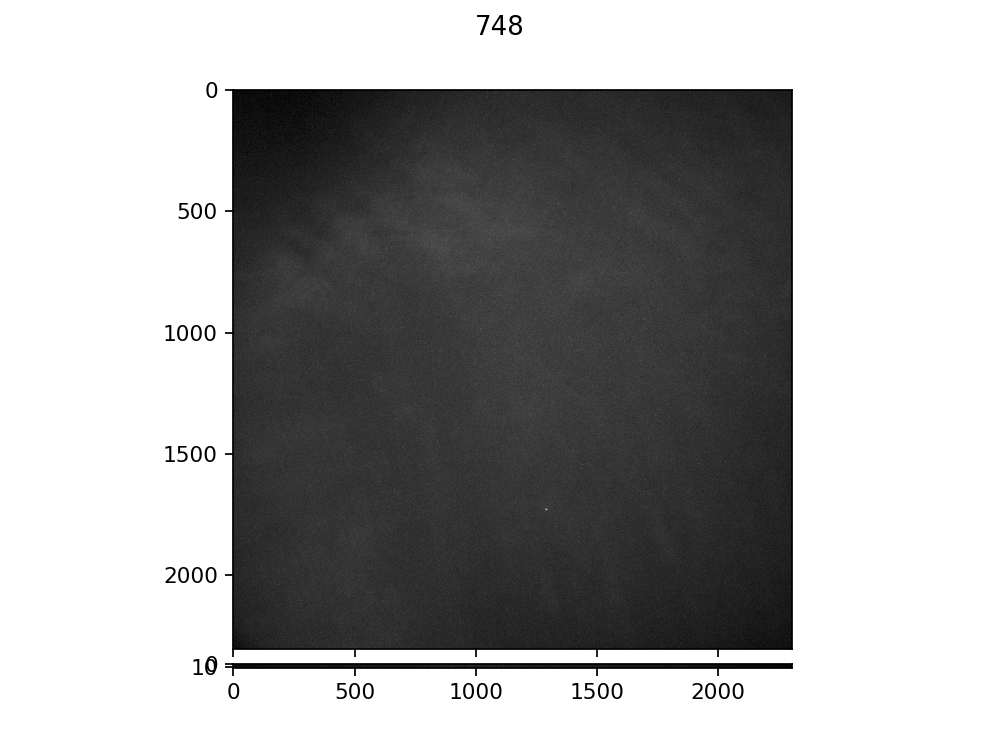

In [10]:
%matplotlib notebook
f = plt.figure(dpi=125)
interactive.imshow_mark_3d(
    [getattr(daxp, f"im_{_ch}") for _ch in daxp.channels], 
    fig=f,
    image_names=daxp.channels, 
    min_max_default=[0,20000],
    )
f.show()